### 前言

https://blog.csdn.net/v_JULY_v/article/details/81708386  这篇文章讲的很详细很容易理解

最大期望算法（Expectation-maximization algorithm，又译为期望最大化算法），是在概率模型中寻找参数最大似然估计或者最大后验估计的算法，其中概率模型依赖于无法观测的隐性变量。

EM算法是机器学习十大算法之一，它很简单，但是也同样很有深度，简单是因为它就分两步求解问题，
- E步：求期望（expectation）
- M步：求极大（maximization)

深度在于它的数学推理涉及到比较繁杂的概率公式等，所以本文会介绍很多概率方面的知识，不懂的同学可以先去了解一些知识，当然本文也会尽可能的讲解清楚这些知识，讲的不好的地方麻烦大家评论指出，后续不断改进完善。

### EM算法引入
概率模型有时候既含有观测变量，又含有隐变量或潜在变量，如果概率模型的变量都是观测变量，那么给定数据，可以直接用极大似然估计法，或贝叶斯估计方法估计模型参数，但是<font color="#F00" size = "4px">当模型含有隐变量时，就不能简单的使用这些方法，EM算法就是含有隐变量的概率模型参数的极大似然估计法，或极大后验概率估计法，</font>我们讨论极大似然估计，极大后验概率估计与其类似。
参考统计学习方法书中的一个例子来引入EM算法， 假设有3枚硬币，分别记做A、B、C，这些硬币正面出现的概率分别是$\pi$、$p$、$q$，进行如下实验：

- 先掷硬币A，根据结果选出硬币B和硬币C，正面选硬币B，反面选硬币C
- 通过选择出的硬币，掷硬币的结果出现正面为1，反面为0
如此独立地重复n次实验，我们当前规定n=10，则10次的结果如下所示：
$$
1,1,0,1,0,0,1,0,1,1
$$
假设只通过观测到掷硬币的结果，不能观测掷硬币的过程，问如何估计三个硬币出现正面的概率？
我们来构建这样一个三硬币模型：
$$
\begin{aligned}
P(y|\theta) &=\sum_{z}P(y,z|\theta)=\sum_{z}P(z|\theta)P(y|z,\theta) \\
  &=\pi p^{y}(1-p)^{1-y}+(1-\pi)q^{y}(1-q)^{1-y}
\end{aligned}
$$

- 若$y=1$，表示这此看到的是正面，这个正面有可能是B的正面，也可能是C的正面，则$P(1|\theta)=\pi p+(1-\pi)q$
- 若$y=0$，则$P(0|\theta)=\pi (1-p)+(1-\pi)(1-q)$

y是观测变量，表示一次观测结果是1或0，z是隐藏变量，表示掷硬币A的结果，这个是观测不到结果的，$\theta=(\pi,p,q)$表示模型参数，将观测数据表示为$Y=(Y_1,Y_2,...,Y_n)^{T}$，未观测的数据表示为$Z=(Z_1,Z_2,...,Z_n)^{T}$，则观测函数的似然函数是：
$$
\begin{aligned}
P(Y|\theta)&=\sum_{Z}P(Z|\theta)P(Y|Z,\theta)\\
&=\prod_{i=0} ( \pi p^{y_i}(1-p)^{1-y_{i}}+(1-\pi)q^{y_{i}}(1-q)^{1-y_{i}})
\end{aligned}
$$
考虑求模型参数$\theta=(\pi,p,q)$的极大似然估计，即：
$$
\hat{\theta}=arg\max_{\theta}logP(Y|\theta)
$$
这个问题没有解析解，只有通过迭代方法来求解，EM算法就是可以用于求解这个问题的一种迭代算法，下面给出EM算法的迭代过程：
- 首先选取初始值，记做$\theta^{0}=(\pi^{0},p^{0},q^{0})$，第i次的迭代参数的估计值为$\theta^{i}=(\pi^{i},p^{i},q^{i})$
- E步：计算在模型参数$\pi^{i}，p^{i}，q^{i}$下观测变量$y_i$来源于硬币B的概率：
$$
\mu^{i+1}=\frac{\pi^{i}(p^{i})^{y_i}(1-p^i)^{1-y_i}}{\pi^{i}(p^{i})^{y_i}(1-p^i)^{1-y_i}+(1-\pi^{i})(q^{i})^{y_i}(1-p^i)^{1-y_i}}
$$
备注一下：这个公式的分母是$P(Y|\theta)$，分子表示是来源与B硬币的概率。

- M步：计算模型参数的新估计值：
$$
\pi^{i+1}=\frac{1}{n}\sum_{j=1}^{n}\mu_{j}^{i+1} 
$$
因为B硬币A硬币出现正面的结果，所以A硬币概率就是$\mu_{j}$的平均值。
$$
p^{i+1}=\frac{\sum_{j=1}^{n}\mu_{j}^{i+1}y_j}{\sum_{j=1}^{n}\mu_{j}^{i+1}}
$$
分子乘以$y_{i}$，所以其实是计算B硬币出现正面的概率。
$$
q^{i+1}=\frac{\sum_{j=1}^{n}(1-\mu_{j}^{i+1})y_j}{\sum_{j=1}^{n}(1-\mu_{j}^{i+1})}
$$
$(1-\mu_{j}^{i+1})$表示出现C硬币的概率。

闭环形成，从$P(Y|\theta)$ 到 $\pi、p、q$一个闭环流程，接下来可以通过迭代法来做完成。针对上述例子，我们假设初始值为$\pi^{0}=0.5，p^{0}=0.5，q^{0}=0.5$，因为对$y_i=1$和$y_i=0$均有$\mu_j^{1}=0.5$，利用迭代公式计算得到$\pi^{1}=0.5，p^{1}=0.6，q^{1}=0.6$，继续迭代得到最终的参数：
$$\widehat{\pi^{0}}=0.5，\widehat{p^{0}}=0.6，\widehat{q^{0}}=0.6$$
如果一开始初始值选择为：$\pi^{0}=0.4，p^{0}=0.6，q^{0}=0.7$，那么得到的模型参数的极大似然估计是$\widehat{\pi}=0.4064，\widehat{p}=0.5368，\widehat{q}=0.6432$，这说明EM算法与初值的选择有关，选择不同的初值可能得到不同的参数估计值。

这个例子中你只观察到了硬币抛完的结果，并不了解A硬币抛完之后，是选择了B硬币抛还是C硬币抛，这时候概率模型就存在着隐含变量！
### EM算法 
输入：观测变量数据Y，隐变量数据Z，联合分布$P(Y,Z|\theta)$，条件分布$P(Z|Y,\theta)$；
输出：模型参数$\theta$
- (1)选择参数的初值$\theta^0$，开始迭代
- (2) E步：记$\theta^i$为第i次迭代参数$\theta$的估计值，在第i+1次迭代的E步，计算
$$
\begin{aligned}
Q(\theta,\theta^i)&=E_{Z}[logP(Y,Z|\theta)|Y,\theta^i]\\
&=\sum_{Z}logP(Y,Z|\theta)P(Z|Y,\theta^i)
\end{aligned}
$$
这里，$P(Z|Y,\theta^i)$是在给定观测数据Y和当前的参数估计$\theta^i$下隐变量数据Z的条件概率分布；

- (3) M步：求使$Q(\theta,\theta^i)$极大化的$\theta$，确定第i+1次迭代的参数的估计值$\theta^{i+1}$，
$$
\theta^{i+1}=arg \max \limits_{\theta}Q(\theta,\theta^{i})
$$
$Q(\theta,\theta^{i})$是EM算法的核心，称为Q函数(Q function)，这个是需要自己构造的。
- (4) 重复第(2)步和第(3)步，直到收敛，收敛条件：
$$
|| \theta^{i+1}-\theta^{i} || < \varepsilon_1
$$
或者：
$$
||Q(\theta^{i+1},\theta^{i})-Q(\theta^{i},\theta^{i})|| <\varepsilon_2
$$
收敛迭代就结束了。我们来拆解一下这个M步骤，

### 推导逼近
主要讲解Jensen不等式，这个公式在推导和收敛都用到，主要是如下的结论：
- $f(x)$是凸函数
$$
f(E(X)) \le E(f(x))
$$
- $f(x)$是凹函数
$$
f(E(X)) \ge E(f(x))
$$

推导出Em算法可以近似实现对观测数据的极大似然估计的办法是找到E步骤的下界，让下届最大，通过逼近的方式实现对观测数据的最大似然估计。统计学习基础中采用的是相减方式，我们来看下具体的步骤。
- 增加隐藏变量
$$
L(\theta)=\sum_{Z}logP(Y|Z,\theta)P(Z,\theta)
$$
则$L(\theta)-L(\theta^{i})$为：
$$
\begin{aligned}
L(\theta)-L(\theta^{i})=log(\sum_{Z} P(Y|Z,\theta^i)\frac{P(Y|Z,\theta)P(Z,\theta)}{P(Y|Z,\theta^i)})-L(\theta^{i})\\
\ge \sum_{Z} P(Y|Z,\theta^i)log(\frac{P(Y|Z,\theta)P(Z,\theta)}{P(Y|Z,\theta^i)})-L(\theta^{i})
\end{aligned}
$$
$\ge$这一个步骤就是采用了凹函数的Jensen不等式做转换。因为$Z$是隐藏变量，所以有$\sum_{Z} P(Y|Z,\theta^i)==1，P(Y|Z,\theta^i)>0$，于是继续变：

$$
\begin{aligned}
L(\theta)-L(\theta^{i})&=log(\sum_{Z} P(Y|Z,\theta^i)\frac{P(Y|Z,\theta)P(Z,\theta)}{P(Y|Z,\theta^i)})-L(\theta^{i})\\
&\ge \sum_{Z} P(Z|Y,\theta^i)log(\frac{P(Y|Z,\theta)P(Z,\theta)}{P(Z|Y,\theta^i)})-L(\theta^{i})\\
&=\sum_{Z} P(Z|Y,\theta^i)log(\frac{P(Y|Z,\theta)P(Z,\theta)}{P(Z|Y,\theta^i)})-\sum_{Z} P(Z|Y,\theta^i)L(\theta^{i})\\
&= \sum_{Z} P(Z|Y,\theta^i)log(\frac{P(Y|Z,\theta)P(Z,\theta)}{P(Z|Y,\theta^i) (P(Y|\theta^{i})}) \\
& \ge0
\end{aligned}
$$
也就是：$L(\theta)\ge L(\theta^{i})+ \sum_{Z} P(Z|Y,\theta^i)log(\frac{P(Y|Z,\theta)P(Z,\theta)}{P(Y|Z,\theta^i) L(\theta^{i})})$，有下界，最大化下界，来得到近似值。这里有一个细节：$P(Y|Z,\theta^i)$ 变为$P(Z|Y,\theta^i)$？如果要满足Jensen不等式的等号，则有：
$$
\frac{P(Y|Z,\theta)P(Z,\theta)}{P(Y|Z,\theta^i)} = c
$$
c为一个常数，而$\sum_{Z}P(Y|Z,\theta^i)=1$则：
$$
\begin{aligned}
\sum_{Z}P(Y|Z,\theta)P(Z,\theta)= c\sum_{Z}P(Y|Z,\theta^i)&=c\\
&=\frac{P(Y|Z,\theta)P(Z,\theta)}{P(Y|Z,\theta^i)}\\
P(Y|Z,\theta)=\frac{P(Y|Z,\theta)P(Z,\theta)}{\sum_{Z}P(Y|Z,\theta)P(Z,\theta)}=\frac{P(Y,Z,\theta)}{P(Y,\theta)}=P(Z|Y,\theta)
\end{aligned}
$$

大家是不是很奇怪$P(Y|Z,\theta)P(Z,\theta)$加上$\sum$之后等于什么，其实有的博客这里使用$P(Z,\theta) = P(Y^i,Z^i,\theta^i)$来替代$P(Y|Z,\theta)$参与计算，这样$\sum_{Z}P(Y^i,Z^i,\theta^i)$，这样就方便理解来了。

于是最大化如下：

$$
\begin{aligned}
\theta^{i+1}&=arg \max_{\theta}\sum_{Z} P(Z|Y,\theta^i)log(\frac{P(Y|Z,\theta)P(Z,\theta)}{P(Z|Y,\theta^i)})\\
&=arg \max_{\theta}\sum_{Z} P(Z|Y,\theta^i)log(P(Y|Z,\theta)P(Z,\theta))\\
& =arg \max_{\theta}\sum_{Z} P(Z|Y,\theta^i)log(P(Y,Z|\theta))\\ 
&=arg \max_{\theta}Q(\theta,\theta^i)
\end{aligned} 
$$
其中$log$分母提出来是关于$Z$的$\sum_{Z} P(Z|Y,\theta^i)logP(Z|Y,\theta^i)$，可以去掉。当然也有博客写的形式是：
$$
arg \max_{\theta}\sum_{i=1}^{M}\sum_{Z^{i}} P(Z^{i}|Y^{i},\theta^i)log(P(Y^{i},Z^{i};\theta))\\ 
$$
形式其实一样，表示的不一样而已。
### 证明收敛
我们知道已知观测数据的似然函数是$P(Y,\theta)$，对数似然函数为：
$$
\begin{aligned}
L()=\sum_{i=1}^{M}logP(y^{i},\theta) &=\sum_{i=1}^{M}log(\frac{P(y^i,Z|\theta)}{P(Z|y^i,\theta)})\\
&=\sum_{i=1}^{M}logP(y^i,Z|\theta) - \sum_{i=1}^{M}logP(Z|y^i,\theta)
\end{aligned} 
$$
要证明收敛，就证明单调递增，$\sum_{i=1}^{M}logP(y^{i},\theta^{j+1})>\sum_{i=1}^{M}logP(y^{i},\theta^{j})$
由上文知道：
$$
\begin{aligned}
Q(\theta,\theta^i)&=\sum_{Z}logP(Y,Z|\theta)P(Z|Y,\theta^i)\\
&=\sum_{i=1}^{M}\sum_{Z^j}logP(y^i,Z^j|\theta)P(Z^j|y^i,\theta^i)
\end{aligned}
$$
我们构造一个函数$H$，让他等于：
$$
H(\theta,\theta^{i})=\sum_{i=1}^{M}\sum_{Z^j}log(P(Z|y^i,\theta)P(Z|y^i,\theta^i))
$$
让$Q(\theta,\theta^i)-H(\theta,\theta^{i})$：
$$
\begin{aligned}
Q(\theta,\theta^i)-H(\theta,\theta^{i})&=\sum_{i=1}^{M}\sum_{Z^j}logP(y^i,Z^j|\theta)P(Z^j|y^i,\theta^i) - \sum_{i=1}^{M}\sum_{Z^j}log(P(Z^j|y^i,\theta)P(Z^j|y^i,\theta^i)) \\
&=\sum_{i=1}^{M}\sum_{Z^j}log\bigg(P(y^i,Z^j|\theta)-P(Z^j|y^i,\theta)\bigg) \\
&=\sum_{i=1}^{M}logP(y^{i},\theta) 
\end{aligned}
$$所以：
$$
\sum_{i=1}^{M}logP(y^{i},\theta^{j+1})-\sum_{i=1}^{M}logP(y^{i},\theta^{j}) \\
= Q(\theta^{i+1},\theta^i)-H(\theta^{i+1},\theta^{i}) - (Q(\theta^{i},\theta^{i})-H(\theta^{i},\theta^{i}))\\
= Q(\theta^{i+1},\theta^i)- Q(\theta^{i},\theta^{i}) -( H(\theta^{i+1},\theta^{i}) - H(\theta^{i},\theta^{i}))
$$
该公式左边已经被证明是大于0，证明右边：$H(\theta^{i+1},\theta^{i}) - H(\theta^{i},\theta^{i})<0$：
$$
\begin{aligned}
H(\theta^{i+1},\theta^{i}) - H(\theta^{i},\theta^{i}) &=\sum_{Z^j}\bigg(log(\frac{P(Z^j|Y,\theta^{i+1})}{P(Z^j|Y,\theta^i)}) \bigg)P(Z^j|Y,\theta^i) \\
&=log\bigg(\sum_{Z^j}\frac{P(Z^j|Y,\theta^{i+1})}{P(Z^j|Y,\theta^i)}P(Z^j|Y,\theta^i) \bigg)\\
&=logP(Z|Y,\theta^{i+1})=log1=0
\end{aligned}
$$
其中不等式是由于Jensen不等式，由此证明了$\sum_{i=1}^{M}logP(y^{i},\theta^{j+1})>\sum_{i=1}^{M}logP(y^{i},\theta^{j})$，证明了EM算法的收敛性。但不能保证是全局最优，只能保证局部最优。
### 高斯混合分布
EM算法的一个重要应用场景就是高斯混合模型的参数估计。高斯混合模型就是由多个高斯模型组合在一起的混合模型（可以理解为多个高斯分布函数的线性组合，理论上高斯混合模型是可以拟合任意类型的分布），例如对于下图中的数据集如果用一个高斯模型来描述的话显然是不合理的：
![](https://imgconvert.csdnimg.cn/aHR0cHM6Ly9yYXcuZ2l0aHVidXNlcmNvbnRlbnQuY29tL0tsYXVzemhhby9waWN0dXJlL21hc3Rlci9waWN0dXJlL2NvbW1vbi8lRTklQUIlOTglRTYlOTYlQUYlRTYlQjclQjclRTUlOTAlODglRTUlOEQlOTUlRTUlODglODYlRTUlQjglODMucG5n?x-oss-process=image/format,png)

两个高斯模型可以拟合数据集，如图所示：
![](https://imgconvert.csdnimg.cn/aHR0cHM6Ly9yYXcuZ2l0aHVidXNlcmNvbnRlbnQuY29tL0tsYXVzemhhby9waWN0dXJlL21hc3Rlci9waWN0dXJlL2NvbW1vbi8lRTklQUIlOTglRTYlOTYlQUYlRTYlQjclQjclRTUlOTAlODglRTUlODglODYlRTUlQjglODMtJUU1JThGJThDJUU1JTg4JTg2JUU1JUI4JTgzLnBuZw?x-oss-process=image/format,png)

如果有多个高斯模型，公式表示为：
$$
P(y|\theta)=\sum_{k=1}^{K}a_k\phi(y|\theta_{k}) \\
\phi(y|\theta_{k})=\frac{1}{\sqrt{2\pi}\delta_{k}}exp(-\frac{(y-\mu_{k})^2}{2 \delta_{k}^{2}}) \\
a_k>0,\sum a_k =1
$$
$\phi(y|\theta_{k})$表示为第k个高斯分布密度模型，定义如上，其中$a_k$表示被选中的概率。在本次模型$P(y|\theta)$中，观测数据是已知的，而观测数据具体来自哪个模型是未知的，有点像之前提过的三硬币模型，我们来对比一下，A硬币就像是概率$a_k$，用来表明具体的模型，而B、C硬币就是具体的模型，只不过这里有很多个模型，不仅仅是B、C这两个模型。我们用$\gamma_{jk}$来表示，则：
$$
\gamma_{jk} =
\begin{cases}
1& \text{第j个观测数据来源于第k个模型}\\
0& \text{否则}
\end{cases}
$$
所以一个观测数据$y_j$的隐藏数据$(\gamma_{j1},\gamma_{j2},...,\gamma_{jk})$，那么完全似然函数就是：

$$
P(y,\gamma|\theta)= \prod_{k=1}^{K}\prod_{j=1}^{N}[a_{k}\phi(y|\theta_{k})]^{\gamma_{jk}}
$$

取对数之后等于：

$$
\begin{aligned}
log(P(y,\gamma|\theta))&=log( \prod_{k=1}^{K}\prod_{j=1}^{N}[a_{k}\phi(y|\theta_{k})]^{\gamma_{jk}})\\
&=\sum_{K}^{k=1}\bigg(\sum_{j=1}^{N}(\gamma_{jk}) log(a_k)+\sum_{j=1}^{N}( \gamma_{jk})\bigg[log(\frac{1}{\sqrt{2\pi}})-log(\delta_{k})-\frac{(y_i-\mu_{k})^2}{2 \delta_{k}^{2}}\bigg]\bigg)
\end{aligned}
$$

- E 步 ：
$$
\begin{aligned}
Q(\theta.\theta^i) &= E[log(P(y,\gamma|\theta))]\\
&=\sum_{K}^{k=1}\bigg(\sum_{j=1}^{N}(E\gamma_{jk}) log(a_k)+\sum_{j=1}^{N}(E\gamma_{jk})\bigg[log(\frac{1}{\sqrt{2\pi}})-log(\delta_{k})-\frac{(y_i-\mu_{k})^2}{2 \delta_{k}^{2}}\bigg]\bigg)
\end{aligned}
$$
其中我们定义$\hat{\gamma_{jk}}$：
$$
\hat{\gamma_{jk}} = E(\gamma_{jk}|y,\theta)=\frac{a_k\phi(y_i|\theta_{k})}{\sum_{k=1}^{K}a_k\phi(y_i|\theta_{k}) }\\
j=1,2,..,N；k=1,2,...,K\\
n_k=\sum_{j=i}^{N}E\gamma_{jk}
$$
于是化简得到：
$$
\begin{aligned}
Q(\theta.\theta^i) &= \sum_{K}^{k=1}\bigg(n_k log(a_k)+\sum_{j=1}^{N}(E\gamma_{jk})\bigg[log(\frac{1}{\sqrt{2\pi}})-log(\delta_{k})-\frac{(y_i-\mu_{k})^2}{2 \delta_{k}^{2}}\bigg]\bigg)
\end{aligned}
$$

E 步 在代码设计上只有$\hat{\gamma_{jk}}$有用，用于M步的计算。


- M步，
$$
\theta^{i+1}=arg \max_{\theta}Q(\theta,\theta^i)
$$
对$Q(\theta,\theta^i)$求导，得到每个未知量的偏导，使其偏导等于0，求解得到：
$$
\hat{\mu_k}=\frac{\sum_{j=1}^{N}\hat{\gamma_{jk}}y_i}{\sum_{j=1}^{N}\hat{\gamma_{jk}}}
\\
\\
\hat{\delta_k}=\frac{\sum_{j=1}^{N}\hat{\gamma_{jk}}(y_i-\mu_k)^2}{\sum_{j=1}^{N}\hat{\gamma_{jk}}}
\\
\\
\\
\hat{a_k}=\frac{\sum_{j=1}^{N}\hat{\gamma_{jk}} }{N}
$$
给一个初始值，来回迭代就可以求得值内容。这一块主要用到了$Q(\theta.\theta^i)$的导数，并且用到了E步的$\hat{\gamma_{jk}}$。

### 总结
这里其实还有很多问题没讲，大家想了解的可以去学习统计学习方法这本书，讲解的还是挺全的。




### 混合高斯分布模型
EM算法更多是一种思想，用概率来解决问题的一种方法，具体的代码看自己选用模型，所以并没有通用的模型，本此代码主要是讲解混合高斯分布模型的

这其中的M步 完全按照了 公式来计算。

In [1]:
import numpy as np
import random
import math
import time

In [2]:
'''
数据集：伪造数据集（两个高斯分布混合）
数据集长度：1000
------------------------------
运行结果：
----------------------------
the Parameters set is:
alpha0:0.3, mu0:0.7, sigmod0:-2.0, alpha1:0.5, mu1:0.5, sigmod1:1.0
----------------------------
the Parameters predict is:
alpha0:0.4, mu0:0.6, sigmod0:-1.7, alpha1:0.7, mu1:0.7, sigmod1:0.9
----------------------------
'''

def loadData(mu0, sigma0, mu1, sigma1, alpha0, alpha1):
    '''
    初始化数据集
    这里通过服从高斯分布的随机函数来伪造数据集
    :param mu0: 高斯0的均值
    :param sigma0: 高斯0的方差
    :param mu1: 高斯1的均值
    :param sigma1: 高斯1的方差
    :param alpha0: 高斯0的系数
    :param alpha1: 高斯1的系数
    :return: 混合了两个高斯分布的数据
    '''
    # 定义数据集长度为10000
    length = 10000

    # 初始化第一个高斯分布，生成数据，数据长度为length * alpha系数，以此来
    # 满足alpha的作用
    data0 = np.random.normal(mu0, sigma0, int(length * alpha0))
    # 第二个高斯分布的数据
    data1 = np.random.normal(mu1, sigma1, int(length * alpha1))

    # 初始化总数据集
    # 两个高斯分布的数据混合后会放在该数据集中返回
    dataSet = []
    # 将第一个数据集的内容添加进去
    dataSet.extend(data0)
    # 添加第二个数据集的数据
    dataSet.extend(data1)
    # 对总的数据集进行打乱（其实不打乱也没事，只不过打乱一下直观上让人感觉已经混合了
    # 读者可以将下面这句话屏蔽以后看看效果是否有差别）
    random.shuffle(dataSet)

    #返回伪造好的数据集
    return dataSet


In [3]:

# 高斯分布公式，没有什么特殊的
def calcGauss(dataSetArr, mu, sigmod):
    '''
    根据高斯密度函数计算值
    依据：“9.3.1 高斯混合模型” 式9.25
    注：在公式中y是一个实数，但是在EM算法中(见算法9.2的E步)，需要对每个j
    都求一次yjk，在本实例中有1000个可观测数据，因此需要计算1000次。考虑到
    在E步时进行1000次高斯计算，程序上比较不简洁，因此这里的y是向量，在numpy
    的exp中如果exp内部值为向量，则对向量中每个值进行exp，输出仍是向量的形式。
    所以使用向量的形式1次计算即可将所有计算结果得出，程序上较为简洁
    
    :param dataSetArr: 可观测数据集
    :param mu: 均值
    :param sigmod: 方差
    :return: 整个可观测数据集的高斯分布密度（向量形式）
    '''
    # 计算过程就是依据式9.25写的，没有别的花样
    result = (1 / (math.sqrt(2*math.pi)*sigmod**2)) * np.exp(-1 * (dataSetArr-mu) * (dataSetArr-mu) / (2*sigmod**2))
    # 返回结果
    return result


def E_step(dataSetArr, alpha0, mu0, sigmod0, alpha1, mu1, sigmod1):
    '''
    EM算法中的E步
    依据当前模型参数，计算分模型k对观数据y的响应度
    :param dataSetArr: 可观测数据y
    :param alpha0: 高斯模型0的系数
    :param mu0: 高斯模型0的均值
    :param sigmod0: 高斯模型0的方差
    :param alpha1: 高斯模型1的系数
    :param mu1: 高斯模型1的均值
    :param sigmod1: 高斯模型1的方差
    :return: 两个模型各自的响应度
    '''
    # 计算y0的响应度
    # 先计算模型0的响应度的分子
    gamma0 = alpha0 * calcGauss(dataSetArr, mu0, sigmod0)
    #print("gamma0=",gamma0.shape) # 1000, 维向量
    # 模型1响应度的分子
    gamma1 = alpha1 * calcGauss(dataSetArr, mu1, sigmod1)

    # 两者相加为E步中的分布
    sum = gamma0 + gamma1
    # 各自相除，得到两个模型的响应度
    gamma0 = gamma0 / sum
    gamma1 = gamma1 / sum

    # 返回两个模型响应度
    return gamma0, gamma1

def M_step(muo, mu1, gamma0, gamma1, dataSetArr):
    # 依据算法9.2计算各个值
    # 这里没什么花样，对照书本公式看看这里就好了
    
    # np.dot 点积：[1,2] [2,3] = [2,6]
    mu0_new = np.dot(gamma0, dataSetArr) / np.sum(gamma0)
    mu1_new = np.dot(gamma1, dataSetArr) / np.sum(gamma1)

    # math.sqrt  平方根 
    sigmod0_new = math.sqrt(np.dot(gamma0, (dataSetArr - muo)**2) / np.sum(gamma0))
    sigmod1_new = math.sqrt(np.dot(gamma1, (dataSetArr - mu1)**2) / np.sum(gamma1))

    alpha0_new = np.sum(gamma0) / len(gamma0)
    alpha1_new = np.sum(gamma1) / len(gamma1)

    # 将更新的值返回
    return mu0_new, mu1_new, sigmod0_new, sigmod1_new, alpha0_new, alpha1_new


## 训练主函数
def EM_Train(dataSetList, iter=500):
    '''
    根据EM算法进行参数估计
    算法依据“9.3.2 高斯混合模型参数估计的EM算法” 算法9.2
    :param dataSetList:数据集（可观测数据）
    :param iter: 迭代次数
    :return: 估计的参数
    '''
    # 将可观测数据y转换为数组形式，主要是为了方便后续运算
    dataSetArr = np.array(dataSetList)

    # 步骤1：对参数取初值，开始迭代
    alpha0 = 0.5
    mu0 = 0
    sigmod0 = 1
    alpha1 = 0.5
    mu1 = 1
    sigmod1 = 1

    # 开始迭代
    step = 0
    while (step < iter):
        # 每次进入一次迭代后迭代次数加1
        step += 1
        # 步骤2：E步：依据当前模型参数，计算分模型k对观测数据y的响应度
        gamma0, gamma1 = E_step(dataSetArr, alpha0, mu0, sigmod0, alpha1, mu1, sigmod1)
        # 步骤3：M步
        mu0, mu1, sigmod0, sigmod1, alpha0, alpha1 = M_step(mu0, mu1, gamma0, gamma1, dataSetArr)

    # 迭代结束后将更新后的各参数返回
    return alpha0, mu0, sigmod0, alpha1, mu1, sigmod1


In [17]:


if __name__ == '__main__':
    start = time.time()

    # 设置两个高斯模型进行混合，这里是初始化两个模型各自的参数
    # 见“9.3 EM算法在高斯混合模型学习中的应用”
    # alpha是“9.3.1 高斯混合模型” 定义9.2中的系数α
    # mu0是均值μ
    # sigmod是方差σ
    # 在设置上两个alpha的和必须为1，其他没有什么具体要求，符合高斯定义就可以
    
    alpha0 = 0.3  # 系数α
    mu0 = -2  # 均值μ
    sigmod0 = 0.5  # 方差σ

    alpha1 = 0.7  # 系数α
    mu1 = 0.5  # 均值μ
    sigmod1 = 1  # 方差σ

    # 初始化数据集
    dataSetList = loadData(mu0, sigmod0, mu1, sigmod1, alpha0, alpha1)

    #打印设置的参数
    print('---------------------------')
    print('the Parameters set is:')
    print('alpha0:%.1f, mu0:%.1f, sigmod0:%.1f, alpha1:%.1f, mu1:%.1f, sigmod1:%.1f' % (
        alpha0, alpha1, mu0, mu1, sigmod0, sigmod1
    ))

    # 开始EM算法，进行参数估计
    alpha0, mu0, sigmod0, alpha1, mu1, sigmod1 = EM_Train(dataSetList)

    # 打印参数预测结果
    print('----------------------------')
    print('the Parameters predict is:')
    print('alpha0:%.1f, mu0:%.1f, sigmod0:%.1f, alpha1:%.1f, mu1:%.1f, sigmod1:%.1f' % (
        alpha0, alpha1, mu0, mu1, sigmod0, sigmod1
    ))

    # 打印时间
    print('----------------------------')
    print('time span:', time.time() - start)

---------------------------
the Parameters set is:
alpha0:0.3, mu0:0.7, sigmod0:-2.0, alpha1:0.5, mu1:0.5, sigmod1:1.0
----------------------------
the Parameters predict is:
alpha0:0.4, mu0:0.6, sigmod0:-1.8, alpha1:0.7, mu1:0.6, sigmod1:0.9
----------------------------
time span: 0.5838720798492432


### E步主要计算内容
其中我们定义$\hat{\gamma_{jk}}$：
$$
\hat{\gamma_{jk}} = E(\gamma_{jk}|y,\theta)=\frac{a_k\phi(y_i|\theta_{k})}{\sum_{k=1}^{K}a_k\phi(y_i|\theta_{k}) }\\
j=1,2,..,N；k=1,2,...,K\\
n_k=\sum_{j=i}^{N}E\gamma_{jk}
$$

### M步 主要计算内容
这一步骤主要是对Q函数求导后的数据进行计算，利用了 E 步 的$\hat{\gamma_{jk}}$

In [18]:
import math
import copy
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
 
#生成随机数据，4个高斯模型
def generate_data(sigma,N,mu1,mu2,mu3,mu4,alpha):
    global X                  #可观测数据集
    X = np.zeros((N, 2))       # 初始化X，2行N列。2维数据，N个样本
    X=np.matrix(X)
    global mu                 #随机初始化mu1，mu2，mu3，mu4
    mu = np.random.random((4,2))
    mu=np.matrix(mu)
    global excep              #期望第i个样本属于第j个模型的概率的期望
    excep=np.zeros((N,4))
    global alpha_             #初始化混合项系数
    alpha_=[0.25,0.25,0.25,0.25]
    for i in range(N):
        if np.random.random(1) < 0.1:  # 生成0-1之间随机数
            X[i,:]  = np.random.multivariate_normal(mu1, sigma, 1)     #用第一个高斯模型生成2维数据
        elif 0.1 <= np.random.random(1) < 0.3:
            X[i,:] = np.random.multivariate_normal(mu2, sigma, 1)      #用第二个高斯模型生成2维数据
        elif 0.3 <= np.random.random(1) < 0.6:
            X[i,:] = np.random.multivariate_normal(mu3, sigma, 1)      #用第三个高斯模型生成2维数据
        else:
            X[i,:] = np.random.multivariate_normal(mu4, sigma, 1)      #用第四个高斯模型生成2维数据
 
    print("可观测数据：\n",X)       #输出可观测样本
    print("初始化的mu1，mu2，mu3，mu4：",mu)      #输出初始化的mu


# E 期望
#  \hat{\gamma_{jk}}
def e_step(sigma,k,N):
    global X
    global mu
    global excep
    global alpha_
    for i in range(N):
        denom=0
        for j in range(0,k):
            #  sigma.I 表示矩阵的逆矩阵
            # np.transpose ：矩阵转置   np.linalg.det():矩阵求行列式
            denom += alpha_[j]*  math.exp(-(X[i,:]-mu[j,:])*sigma.I*np.transpose(X[i,:]-mu[j,:]))  /np.sqrt(np.linalg.det(sigma))       #分母
        for j in range(0,k):
            numer = math.exp(-(X[i,:]-mu[j,:])*sigma.I*np.transpose(X[i,:]-mu[j,:]))/np.sqrt(np.linalg.det(sigma))        #分子
            excep[i,j]=alpha_[j]*numer/denom      #求期望
    print("隐藏变量：\n",excep)

    
def m_step(k,N):
    global excep
    global X
    global alpha_
    for j in range(0,k):
        denom=0   #分母
        numer=0   #分子
        for i in range(N):
            numer += excep[i,j]*X[i,:]
            denom += excep[i,j]
        mu[j,:] = numer/denom    #求均值
        alpha_[j]=denom/N        #求混合项系数

        #     #可视化结果
def plotShow():
    # 画生成的原始数据
    plt.subplot(221)
    plt.scatter(X[:,0].tolist(), X[:,1].tolist(),c='g',s=25,alpha=0.4,marker='o')    #T散点颜色，s散点大小，alpha透明度，marker散点形状
    plt.title('random generated data')
    #画分类好的数据
    plt.subplot(222)
    plt.title('classified data through EM')
    order=np.zeros(N)
    color=['b','r','k','y']
    for i in range(N):
        for j in range(k):
            if excep[i,j]==max(excep[i,:]):
                order[i]=j     #选出X[i,:]属于第几个高斯模型
            probility[i] += alpha_[int(order[i])]*math.exp(-(X[i,:]-mu[j,:])*sigma.I*np.transpose(X[i,:]-mu[j,:]))/(np.sqrt(np.linalg.det(sigma))*2*np.pi)    #计算混合高斯分布
        plt.scatter(X[i, 0], X[i, 1], c=color[int(order[i])], s=25, alpha=0.4, marker='o')      #绘制分类后的散点图
    #绘制三维图像
    ax = plt.subplot(223, projection='3d')
    plt.title('3d view')
    for i in range(N):
        ax.scatter(X[i, 0], X[i, 1], probility[i], c=color[int(order[i])])
    plt.show()
        
        
        
        
        
        

In [19]:
if __name__ == '__main__':
    iter_num=10000  #迭代次数
    N=500         #样本数目
    k=4            #高斯模型数
    probility = np.zeros(N)    #混合高斯分布
    u1=[5,35]
    u2=[30,40]
    u3=[20,20]
    u4=[45,15]
    sigma=np.matrix([[30, 0], [0, 30]])               #协方差矩阵
    alpha=[0.1,0.2,0.3,0.4]         #混合项系数
    generate_data(sigma,N,u1,u2,u3,u4,alpha)     #生成数据
    #迭代计算
    for i in range(iter_num):
        err = 0
        err_alpha = 0
        Old_mu = copy.deepcopy(mu)
#         err = 0
#         # 均值误差
#         err_alpha=0    #混合项系数误差
#         Old_mu = copy.deepcopy(mu)
        Old_alpha = copy.deepcopy(alpha_)
        
        e_step(sigma,k,N)     # E步
        m_step(k,N)           # M步
        
        print("迭代次数:",i+1)
        print("估计的均值:",mu)
        print("估计的混合项系数:",alpha_)
        for z in range(k):
            err += (abs(Old_mu[z,0]-mu[z,0])+abs(Old_mu[z,1]-mu[z,1]))      #计算误差
            err_alpha += abs(Old_alpha[z]-alpha_[z])
        if (err<=0.001) and (err_alpha<0.001):     #达到精度退出迭代
            print(err,err_alpha)
            break

    

可观测数据：
 [[27.47071586 13.78131203]
 [36.08711086 33.12093359]
 [36.12951246 38.23882586]
 [51.29788292 25.42902469]
 [38.04178618  7.23694002]
 [21.65814784 17.89610632]
 [42.14089133 15.82589745]
 [47.70895812 15.8046302 ]
 [20.02783251 17.9828071 ]
 [14.38206525 27.78875972]
 [43.09868989 17.75546629]
 [27.95670349 44.4656279 ]
 [43.58179492  2.9147323 ]
 [ 9.5929151  19.28967499]
 [52.22639476 14.78814008]
 [37.52753198 12.38938704]
 [40.36102372 15.44667944]
 [51.69340135 18.1157353 ]
 [16.94974442 20.33120546]
 [40.14159436 17.25198019]
 [29.01321771 41.27033752]
 [45.05318609 18.37366695]
 [37.67926367 16.76290625]
 [20.16637528 29.99158529]
 [23.80353514 15.55236522]
 [39.52719369 20.33368314]
 [56.75945428 24.02006969]
 [50.11665041 11.84005107]
 [30.75782996 33.15532389]
 [40.07336436 13.55969791]
 [48.18921755 12.90340284]
 [52.25937641 11.4409246 ]
 [46.80351753 12.11762428]
 [13.78761226 26.21980546]
 [30.51814074 40.5128856 ]
 [42.09883148 16.72462767]
 [-1.5205516  31.910

隐藏变量：
 [[0.35528268 0.10626457 0.29630459 0.24214816]
 [0.33967774 0.07161901 0.42110646 0.16759679]
 [0.32053584 0.06830914 0.46348291 0.14767211]
 ...
 [0.41418428 0.06656081 0.27014346 0.24911145]
 [0.40814884 0.0697204  0.2742865  0.24784425]
 [0.34086818 0.1191868  0.29886194 0.24108308]]
迭代次数: 1
估计的均值: [[36.28831289 20.28483499]
 [25.61261502 23.981405  ]
 [29.42867171 25.62374794]
 [35.67452106 19.37046961]]
估计的混合项系数: [0.3547729656904198, 0.09106821687547063, 0.3449829365124722, 0.20917588092163725]
隐藏变量：
 [[3.29599277e-01 1.28559030e-01 1.43862714e-01 3.97978979e-01]
 [1.03703262e-01 1.03156261e-02 8.58906992e-01 2.70741195e-02]
 [1.93245942e-02 6.58352439e-03 9.70405249e-01 3.68663213e-03]
 ...
 [6.14511001e-01 2.33943151e-05 9.90960699e-04 3.84474644e-01]
 [6.01596666e-01 5.91444713e-05 1.79600008e-03 3.96548189e-01]
 [1.30294902e-01 4.76028413e-01 2.03257946e-01 1.90418739e-01]]
迭代次数: 2
估计的均值: [[44.53844961 16.24786369]
 [12.52119249 26.04894577]
 [28.47102566 35.2074822 ]
 

隐藏变量：
 [[7.12142840e-05 9.50967672e-09 9.18160474e-11 9.99928776e-01]
 [3.25482238e-05 5.06475253e-10 9.99917839e-01 4.96120005e-05]
 [7.41672237e-09 1.39400294e-11 9.99999973e-01 1.91004025e-08]
 ...
 [9.99688222e-01 5.17189604e-18 7.66151999e-11 3.11777947e-04]
 [9.98225352e-01 1.26523153e-16 2.72817588e-10 1.77464757e-03]
 [8.63057400e-07 1.93910014e-07 6.72267877e-12 9.99998943e-01]]
迭代次数: 15
估计的均值: [[45.2132298  15.23819568]
 [ 8.31923188 31.15954117]
 [31.74015572 39.97282587]
 [23.60733394 17.74089127]]
估计的混合项系数: [0.4858006791121792, 0.16757962968459597, 0.1573535250114544, 0.1892661661917702]
隐藏变量：
 [[1.83851191e-04 5.11084500e-10 1.47259119e-10 9.99816148e-01]
 [4.05128943e-05 5.78969317e-11 9.99936873e-01 2.26140295e-05]
 [9.09973994e-09 2.67913078e-12 9.99999980e-01 1.12236461e-08]
 ...
 [9.99976232e-01 5.46380481e-20 6.62006315e-11 2.37676012e-05]
 [9.99839592e-01 1.45966333e-18 2.28696522e-10 1.60407329e-04]
 [1.50907561e-06 8.03376432e-09 6.71121471e-12 9.99998483e-01]]
迭

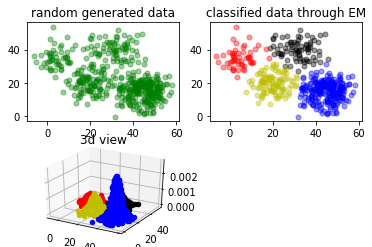

In [20]:
# 画图
plotShow()

### 参考博客
主要参考统计学习方法这本书，书籍地址：http://www.dgt-factory.com/uploads/2018/07/0725/%E7%BB%9F%E8%AE%A1%E5%AD%A6%E4%B9%A0%E6%96%B9%E6%B3%95.pdf。


[统计学习方法-代码解读](https://github.com/fengdu78/lihang-code)

[EM算法 - 期望极大算法](https://blog.csdn.net/randompeople/article/details/93711747)

